# Allen fMOST ingest demo 

In this notebook we will showcase loading neuronal reconstructions from [Soerensen et al.](https://www.biorxiv.org/content/10.1101/2023.11.25.568393v1). 

To run this code you will need to install/download the following packages and data:
- the fMOST reconstructions (in our case kindly provided by S. Soerensen directly)
- the Allen CCF template downloaded from [here](https://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/average_template/)
- the following Python packages:
  - [navis](https://github.com/navis-org/navis) 
  - [navis-mousebrains](https://github.com/navis-org/navis-mousebrains/tree/main/mousebrains/data)

In [1]:
import navis
import mousebrains

In [2]:
# Load the HPF fMOST dataset (adjust file path as needed)
neurons = navis.read_swc(
    "/Volumes/JData5/JPeople/Common/Neuroanatomy/mouse/hippocampus/UM1_DATA_swcFiles/"
)

# Show a quick summary of the loaded neurons
neurons

Importing:   0%|          | 0/110 [00:00<?, ?it/s]

,type,name,n_nodes,n_connectors,n_branches,n_leafs,cable_length,soma,units,created_at,origin
0,navis.TreeNeuron,191803_8254-X7045-Y21580_reg,16475,None,212,222,78523.539062,None,1 dimensionless,2024-06-10 19:33:06.285327,/Volumes/JData5/JPeople/Common/Neuroanatomy/mo...
1,navis.TreeNeuron,192339_7342-X4189-Y20283_reg,26893,None,136,144,97194.507812,None,1 dimensionless,2024-06-10 19:33:06.683522,/Volumes/JData5/JPeople/Common/Neuroanatomy/mo...
...,...,...,...,...,...,...,...,...,...,...,...
108,navis.TreeNeuron,182709_7808-X8334-Y22917_reg,11057,None,145,151,30136.189453,None,1 dimensionless,2024-06-10 19:33:46.639013,/Volumes/JData5/JPeople/Common/Neuroanatomy/mo...
109,navis.TreeNeuron,18869_6732-X9649-Y3919_reg,31683,None,522,530,48117.101562,None,1 dimensionless,2024-06-10 19:33:47.091496,/Volumes/JData5/JPeople/Common/Neuroanatomy/mo...


In [3]:
# Make our life a bit easier by translating the SWC labels
for n in neurons:
    # Set the soma based on the label
    n.soma = n.nodes.loc[n.nodes.label == 1, "node_id"].values[0]

    # Set a compartments column
    n.nodes["compartment"] = (
        n.nodes.label.map(
            {
                1: "soma",
                2: "axon",
                3: "dendrite",
                4: "apical dendrite",
            }
        )
        .astype(str)
        .fillna("undefined")
        .astype("category")
    )

(<Figure size 720x720 with 1 Axes>, <Axes3D: >)

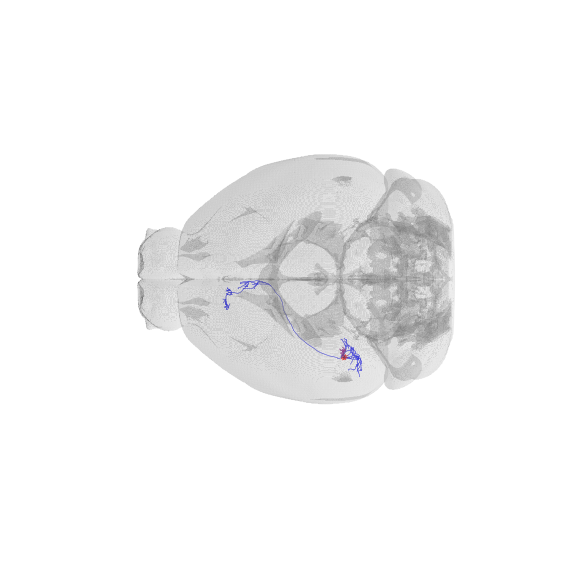

In [4]:
# Plot one of the neurons
comp_colors = {
    "soma": "k",
    "axon": "blue",
    "dendrite": "red",
    "apical dendrite": "purple",
}

# N.B. the brain mesh is currently pretty high res which slows down plotting
# (might switch to a lower res version in the future)
navis.plot2d(
    [neurons[10], mousebrains.AllenCCF], color_by="compartment", palette=comp_colors
)

In [ ]:
# We can also generate an interactive 3D plot using the plotly backend
navis.plot3d(
    [neurons[10], mousebrains.AllenCCF], color_by="compartment", palette=comp_colors
)